# Estimating errors between two trajectories

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import validator as validator
from utils import *
from matplotlib.ticker import MaxNLocator

---
## Solution 2 - Pivots

In [2]:
dist, dist_to_line = distance, distance_to_line

def find_next_focus_point1(p1, p2, q1, q2):
    """
    The closest point (p2 or q2) to the two current points (p1 or q1)
    Returns: True if p2 is the next focus point, False if q2
    """
    return min(dist(p2, p1), dist(p2, q1)) < min(dist(q2, p1), dist(q2, q1)) #p2 is the closest point

def find_next_focus_point2(p1, p2, q1, q2):
    """
    The closest point (p2 or q2) to its respective point (p1 or q1)
    """
    return dist(p2, p1) < dist(q2, q1) #p2 is the closest point
    
def find_next_focus_point3(p1, p2, q1, q2):
    """
    distance between p2 (or q1) and the line (p1q1) 
    """
    return dist_to_line(*(p1, q1), p2) < dist_to_line(*(p1, q1), q2)


def find_next_focus_point4(p1, p2, q1, q2, oldpoint):
    """
    distance between p2 (or q1) and the line (p1q1) 
    """
    wrong_side = orientation(p1, q1, oldpoint)
    if orientation(p1, q1, p2) == wrong_side:
        return False
    elif orientation(p1, q1, q2) == wrong_side:
        return True
    else:
        return dist_to_line(*(p1, q1), p2) < dist_to_line(*(p1, q1), q2)
    
def find_next_focus_point5(p1, p2, q1, q2):
    """
    The closest point (p2 or q2) to its respective point (p1 or q1)
    """
    return dist(q1, p2) < dist(q2, p1) #p2 is the closest point

We are defining `si` and `tj` instead of simply using `S[i]` and `T[j]`, in order to be capable of redefining these points in the case of intersection.

### *Idea 1* - Simple switch between pivots

In [12]:
def error_btw_trajectories1(S, T):
    i, j = 0, 0 # i (or j) is the index of the current point along S (or T)
    si, tj = S[i], T[j]
    plt.figure()
    plt.plot(*S.transpose(), '-o', *T.transpose(), '-o')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    #     plt.axis("equal")
    plt.grid()
    error, old_point = 0, S[0]
    while i < len(S) - 1 and j < len(T) - 1:
        intersect = intersection_btw_segs(si, S[i+1], tj, T[j+1])
        if np.all(intersect != np.inf): # if the segments [S_i, S_i+1] and [T_i, T_i+1] intersect
            # Compute area of the triangle intersect, si, tj
            error += triangle_area(si, tj, intersect, ax)
            old_point = si # TODO : is this a good idea ??????????
            si, tj = intersect, intersect
            plt.plot(*intersect, 'og')
#             print("intersection")
        else:
            if find_next_focus_point3(si, S[i+1], tj, T[j+1]):
                old_point = si
                si, i = S[i+1], i+1
            else:
                old_point = tj
                tj, j = T[j+1], j+1
            # Compute area of the triangle old_point, si, tj
            error += triangle_area(old_point, si, tj, ax)
#         print(i, j, error)
    
    if i == len(S) - 1:
        error += triangle_area(si, tj, T[j+1], ax)
        j += 1
        for j in range(j, len(T)-1):
            error += triangle_area(si, T[j], T[j+1], ax)
    elif j == len(T) - 1: #else ?
        error += triangle_area(tj, si, S[i+1], ax)
        i += 1
        for i in range(i, len(S)-1):
            error += triangle_area(tj, S[i], S[i+1], ax)
    plt.show()
    Slen = sum(norm(S[i+1] - S[i]) for i in range(len(S) - 1))
    return error / Slen

SR1.txt	

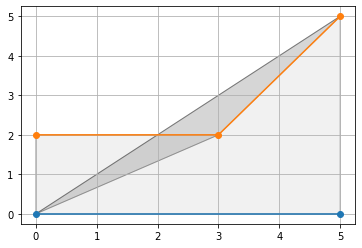

NOT ok 	 The expected value is 2.6, but the output value is 3.6.

SR2.txt	

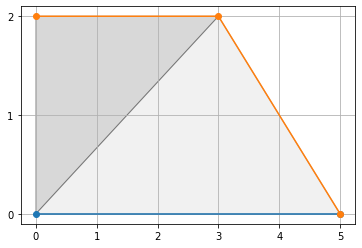

ok 	 The expected value is indeed 1.6

SR3.txt	

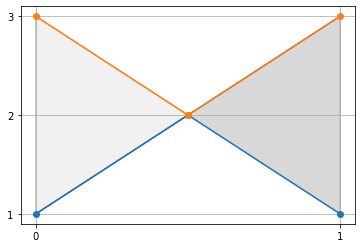

ok 	 The expected value is indeed 0.4472135954999579

SR4.txt	

/home/jean/Documents/M1/CSintro/err_btw_trajectories/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  return abs(b*B[1] - a*B[0] - c)/np.hypot(a, b)


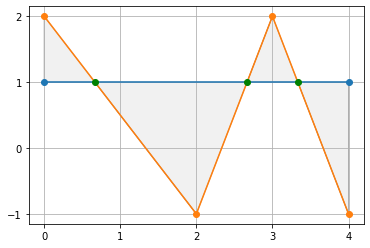

NOT ok 	 The expected value is 0.83, but the output value is 0.8333333333333335.

SR5.txt	

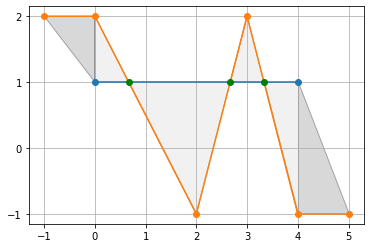

ok 	 The expected value is indeed 1.2083333333333333

SR6.txt	

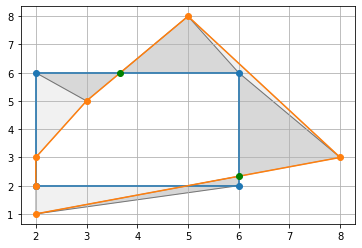

NOT ok 	 The expected value is 0.6325, but the output value is 0.71875.

[test0]simple.txt	

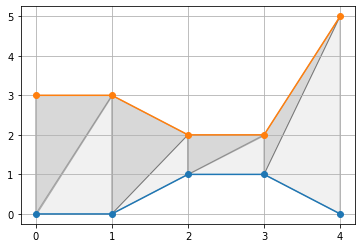

NOT ok 	 The expected value is 1.8639, but the output value is 1.8639610306789278.

[test1]negative.txt	

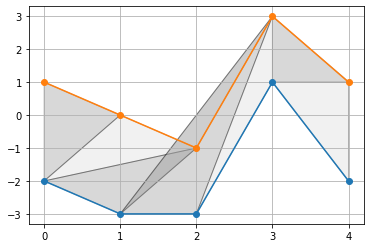

NOT ok 	 The expected value is 1.0309, but the output value is 1.2371648211623818.

[test2]simple2.txt	

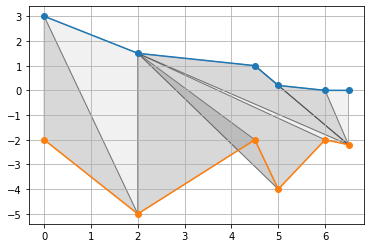

NOT ok 	 The expected value is 3.9033, but the output value is 4.33598426047476.

[test3]intersection.txt	

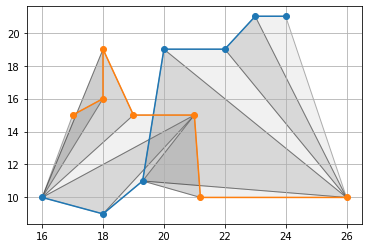

NOT ok 	 The expected value is 3.5442, but the output value is 4.701456230051124.

[test4]poor_sided.txt	

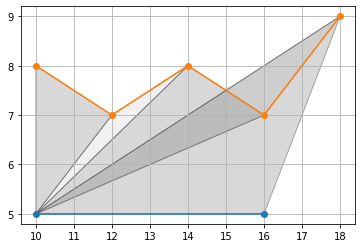

NOT ok 	 The expected value is 2.8333, but the output value is 4.166666666666667.

[test6].txt	

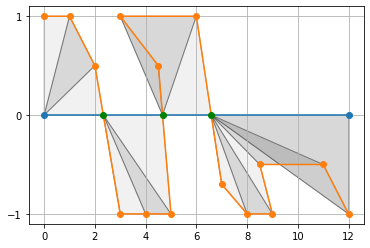

NOT ok 	 The expected value is 0.8122, but the output value is 1.0099264705882354.

[test7].txt	

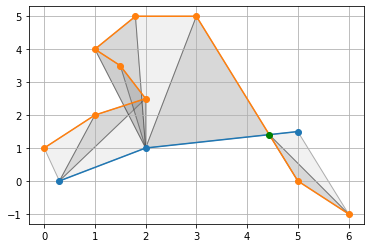

NOT ok 	 The expected value is 2.0329, but the output value is 2.7063402798353655.

untitled-Copy1.txt	

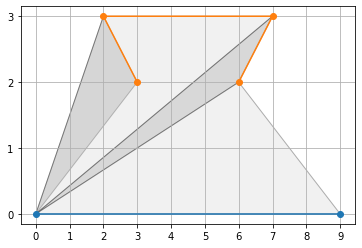

NOT ok 	 The expected value is -1.0, but the output value is 2.3333333333333335.

untitled.txt	

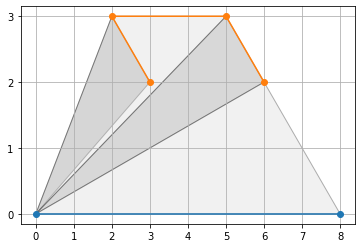

NOT ok 	 The expected value is -1.0, but the output value is 2.375.

untitled1.txt	

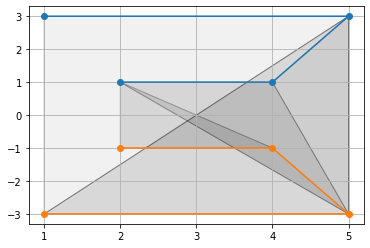

NOT ok 	 The expected value is 2.4283432403227163, but the output value is 4.128183508548617.



False

In [13]:
validator.test(error_btw_trajectories1, samples_range = slice(0, None), dirname = "../indoor-location-oracles/Oracles/")